# Исследование закономерностей влияющих на успешность игр для подготовки рекламных компаний на 2017 год. 

Отчет формируется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). На основе этих данных определим тенденции, взаимосвязи и пердложим стратегии развития на 2017 год. 
\
<b>План выполнения проекта:</b>\
Шаг 1. Открыть файл с данными и изучить общую информацию\
Шаг 2. Подготовить данные\
Шаг 3. Проведите исследовательский анализ данных\
Шаг 4. Составьте портрет пользователя каждого региона\
Шаг 5. Проверьте гипотезы\
Шаг 6. Общий вывод\


<b>Описание данных:</b>
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [69]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

## Загрузка данных

In [70]:
try:
    df=pd.read_csv('/da/games.csv')
except:
    df=pd.read_csv('C\\data/games.csv')

In [71]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица отражает данные по играм - на каких платформах выходили, в каком году, жанр, продажи по регионам и рейтинги.\
В таблице 11 колонок и 16 715 строк. В таблице нужно изменить названия колонок и изменить ти данных для дальнейшей работы. 

## Подготовка данных

### Переименование столбцов

In [73]:
df.columns = df.columns.str.lower()

In [74]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия колонок приведены к нижнему регистру для удобства работы. 

### Устранение пропусков

In [75]:
before_row = df.shape[0]
before_row

16715

In [76]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [77]:
display(df[df['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [78]:
df = df.dropna(subset=['name'])

In [79]:
df = df.dropna(subset=['year_of_release'])

In [80]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [81]:
after_row = df.shape[0]
#after_row
drop_part = after_row/before_row
print(f"{drop_part:.0%}")

98%


In [82]:
print(df['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


ESRB (англ. Entertainment Software Rating Board) создана в 1994 года. Проверим, зависят ли пропуски от года выход игры:

In [83]:
old_games = df.query('year_of_release < 1994')
old_games['rating'].value_counts()

T       2
E10+    1
M       1
Name: rating, dtype: int64

До 1994 только у 4 игр есть рейтинг. Соответственно, взаимосвязь есть - играм до 1994 год не присваивался рейтинг ESRB. Соответственно, нет смысла в восстановлении пропущенных данных или удалении.  

In [84]:
df['rating'] = df['rating'].fillna('unknow')

Аббривеатура "tbd" является сокращением -  "To Be Determined", т.е. "будет определено позднее". 

In [85]:
display(df.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [86]:
df['user_score'] = df['user_score'].replace({'tbd', np.nan})
#display(df.query('user_score == "tbd"'))

Невосполнимые пропуски были обнаружены в столбцах name, year_of_release, genre - скорее всего это ошибка ввода данных. Большое кол-во пропусков в столбце rating связаны с тем, чтодо 1994 года эта система сертификации игр не существовала. В user_score встречается аббривеатура "tbd" (англ."To Be Determined"), т.е. "будет определено позднее". Эти значения возникли скорее всего из-за того, что данные не аггрегировались в те года, либо не было площадок для системного сбора оценок. 

### Изменение типа данных

In [87]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [88]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [89]:
df['year_of_release']= df['year_of_release'].astype('int')

In [90]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [91]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Столбцы year_of_release и user_score приведены к корректному типу данных.

### Удаляем дубликаты

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [93]:
df.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknow
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknow
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknow


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [95]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [96]:
key = ['name','platform','year_of_release']
duplicate_df = df.fillna(-999).groupby(key)['name'].count().sort_values(ascending=False).head(20)
duplicate_df

name                        platform  year_of_release
Madden NFL 13               PS3       2012               2
 Beyblade Burst             3DS       2016               1
Ratatouille                 PC        2007               1
Rapala Tournament Fishing!  X360      2006               1
Rapala Trophies             PSP       2006               1
Rapala for Kinect           X360      2011               1
Rapala's Fishing Frenzy     Wii       2008               1
Rapala: We Fish             Wii       2009               1
Rapid Reload                PS        1995               1
Rare Replay                 XOne      2015               1
Rascal                      PS        1998               1
Rat Attack!                 N64       2000               1
                            PS        1999               1
Ratatouille                 DS        2007               1
                            GBA       2007               1
                            GC        2007               1
  

In [97]:
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


 Обнаружена техническая ошибка - продажи для одной игры в регионе Европы разделились на 2 части что создало дубликат. 

In [98]:
df.loc[604, 'eu_sales']= df.loc[604, 'eu_sales'] + df.loc[16230, 'eu_sales']
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [99]:
df = df.drop(index= 16230)

In [100]:
key = ['name','platform','year_of_release']
duplicate_df = df.fillna(-999).groupby(key)['name'].count().sort_values(ascending=False).head(10)
duplicate_df

name                        platform  year_of_release
 Beyblade Burst             3DS       2016               1
Reactor                     2600      1981               1
Rapala Tournament Fishing!  Wii       2006               1
                            X360      2006               1
Rapala Trophies             PSP       2006               1
Rapala for Kinect           X360      2011               1
Rapala's Fishing Frenzy     Wii       2008               1
Rapala: We Fish             Wii       2009               1
Rapid Reload                PS        1995               1
Rare Replay                 XOne      2015               1
Name: name, dtype: int64

Найден дубликат игры Madden NFL 13, данные по продажам в европейском регионе объединены, а дублирующая строка удалена.

### Добавление столбца с суммарными продажами

In [101]:
total_sales = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.insert(loc= 8, column='total_sales', value=total_sales)

In [102]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknow


Добавлен новый столбец с суммарными продажами по всем регионам.

<b>Вывод после предобработки данных:</b>\
Невосполнимые пропуски были обнаружены в столбцах name, year_of_release, genre - скорее всего это ошибка ввода данных. Большое кол-во пропусков в столбце rating связаны с тем, чтодо 1994 года эта система сертификации игр не существовала. В user_score встречается аббривеатура "tbd" (англ."To Be Determined"), т.е. "будет определено позднее". Эти значения возникли скорее всего из-за того, что данные не аггрегировались в те года, либо не было площадок для системного сбора оценок.\
Дубликатов не обнаруженою\
Создан новый столбец с суммарными продажами по регионам. 

## Исследовательский анализ данных

### Анализ выпуска игр по годам

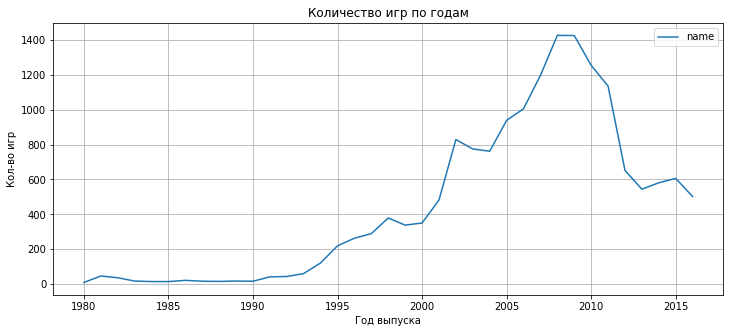

In [103]:
(df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Количество игр по годам')
plt.ylabel('Кол-во игр')
plt.xlabel('Год выпуска')
plt.show()

На графике видно, что до 1994 года выпускалось меньше 100 игр, после произошел резкий рост индустрии и после 2008 года вновь пошел на спад.\
Для дальнейшей аналитики можно отсечь данные до 1994 года, они не покажут тенденций рынка, которые могут быть применены к предсказанию на 2017 год. 

### Изменения продаж по платформам

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


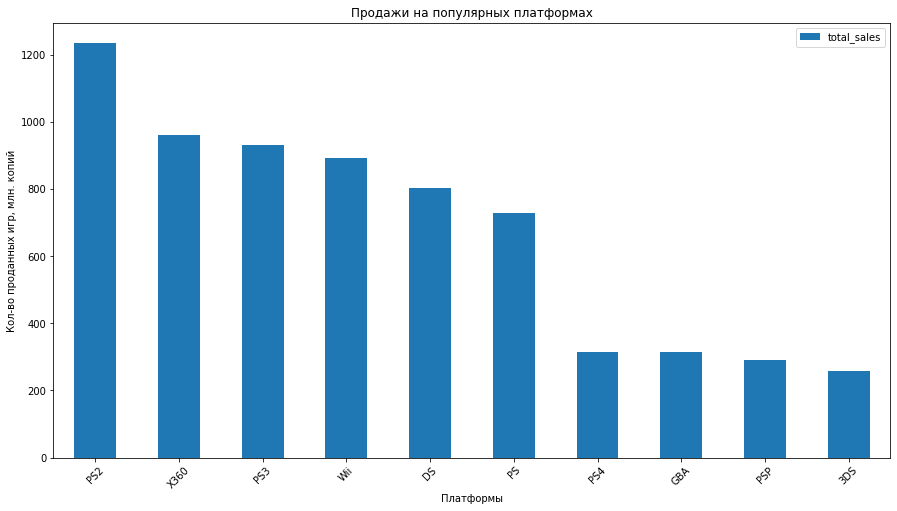

In [104]:
df_platform = df.pivot_table(index='platform', values='total_sales', aggfunc=sum).reset_index()
#platform_pivot
#platform_sales.columns=['platform','total_sales']
df_platform = df_platform.sort_values(by='total_sales', ascending=False).head(10)
display(df_platform)
df_platform.plot(x='platform', kind= 'bar', figsize=(15, 8))
plt.xticks(rotation=45)
plt.title('Продажи на популярных платформах')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Платформы')
plt.show()

Самая популярная платформа по продажам - PS2, ,более 1 миллиарда проданных копий игр. За ней следуют X360, PS3 и Wii. 

Посмотрим как менялись продажи на этих самых прибыльных платформах:

In [105]:
top_platform = df_platform["platform"]
platform_pivot = df.query('platform in @top_platform').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc = 'sum')
display(platform_pivot.sort_values(by='total_sales', ascending=False).head(10))

total_sales
platform year_of_release             
PS2      2004                  211.81
Wii      2009                  206.97
PS2      2002                  205.38
         2003                  184.31
Wii      2008                  171.32
X360     2010                  170.03
PS       1998                  169.49
PS2      2001                  166.43
         2005                  160.66
PS3      2011                  156.78

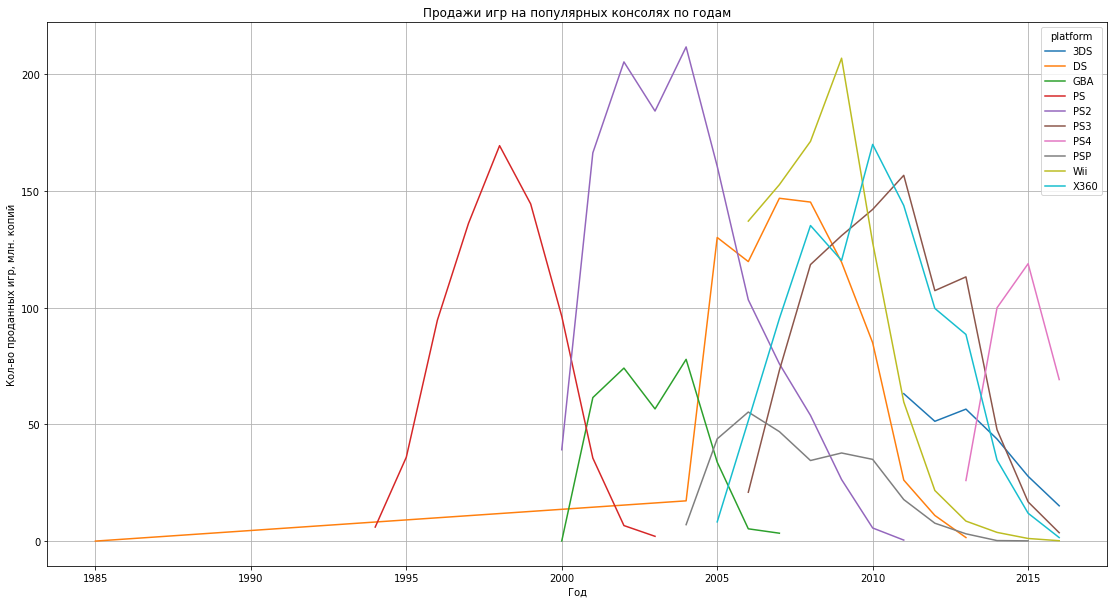

In [106]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.lineplot(data=platform_pivot,x='year_of_release', y='total_sales', hue='platform', estimator=sum)
plt.title('Продажи игр на популярных консолях по годам')
plt.grid(True)
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()


In [107]:
df.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,NaN,NaN,unknow


На графике видим, что с 1985 по 2004 года для приставки DS вышла всего 1 игра, что является явной ошибкой. Если изучить информацию из интернета, дата выхода DS - 21/11/2004. Т.к. продажи шли только в Японии и они небольшие, не известны рейтинги критиков и пользователей, и не удалось найти корректную дату в интернете, удалим эту строку и еще раз вызовем график.   

In [108]:
df = df.drop(index= 15957)

In [109]:
platform_pivot = df.query('platform in @top_platform').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc = 'sum')

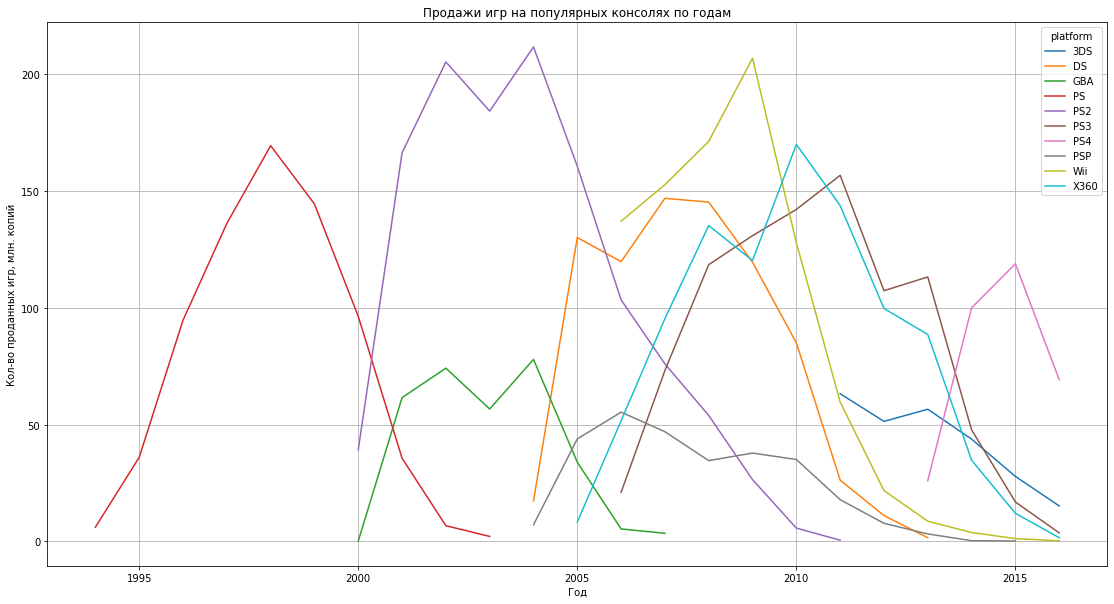

In [110]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.lineplot(data=platform_pivot,x='year_of_release', y='total_sales', hue='platform', estimator=sum)
plt.title('Продажи игр на популярных консолях по годам')
plt.grid(True)
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()

Большая часть популярных консолей начала появляться после 2000 года. Пиками продаж на одной консоли были 2002, 2003, 2004 для PS2, 2008 и 2009 для Wii, 2010 для X360. 

Рассмотрим средний срок жизни консолей:

In [111]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

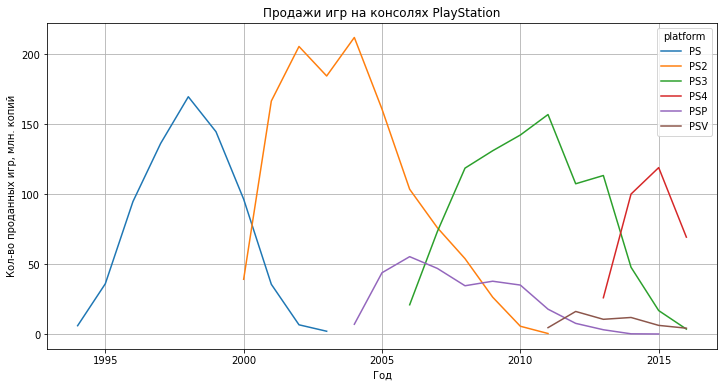

In [112]:
ps_list = ['PS3', 'PS2', 'PS4','PS', 'PSP', 'PSV']
ps_sales = df.query('platform in @ps_list').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc=sum)

plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(data=ps_sales.reset_index(), x='year_of_release',y='total_sales', hue='platform')
plt.title('Продажи игр на консолях PlayStation')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()

Исходя из графика средний срок существования консолей PlayStation -  5-10 лет. 

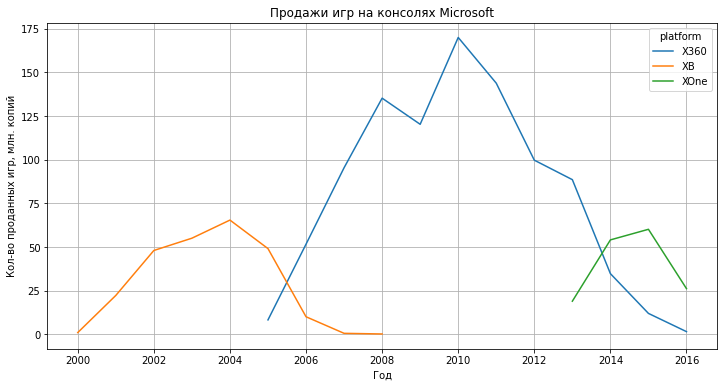

In [113]:
ms_list = ['X360', 'XB', 'XOne']
ms_sales = df.query('platform in @ms_list').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc=sum)

plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(data=ms_sales.reset_index(), x='year_of_release',y='total_sales', hue='platform')
plt.title('Продажи игр на консолях Microsoft')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()

Средний срок жизни консолей Microsoft - 6,5 лет

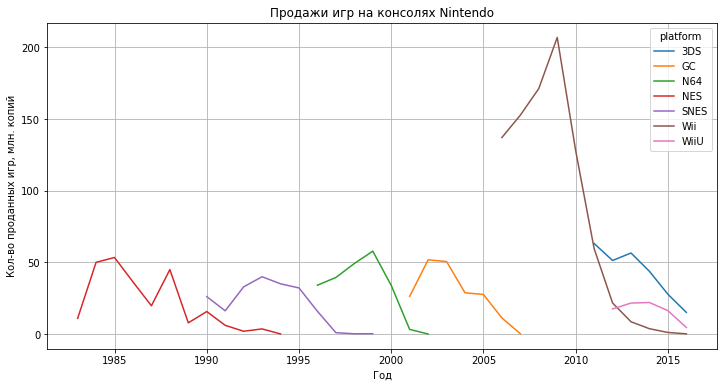

In [114]:
nt_list = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', '3DS']
nt_sales = df.query('platform in @nt_list').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc=sum)

plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(data=nt_sales.reset_index(), x='year_of_release',y='total_sales', hue='platform')
plt.title('Продажи игр на консолях Nintendo')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()

Средний срок существования стационарных консолей Nintendo - 7 лет. 

На основе предыдущих графиков можно сделать вывд, что средний срок жизни консоей - 7 лет. Но с течением времени на графиках мы видим сокращение этой цифры. Для того, чтобы сделать актуальный прогноз, необходимо взять для рассмотрения актуальное поколение консолей - PS4, XboxOne и WiiU. Они начали свой цикл в 2013 году, поэтому будем брать для анализа период с этой даты.   

In [115]:
actual_df = df.query('year_of_release >=2013')
actual_df_pivot = actual_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc = 'sum')
#actual_df_pivot

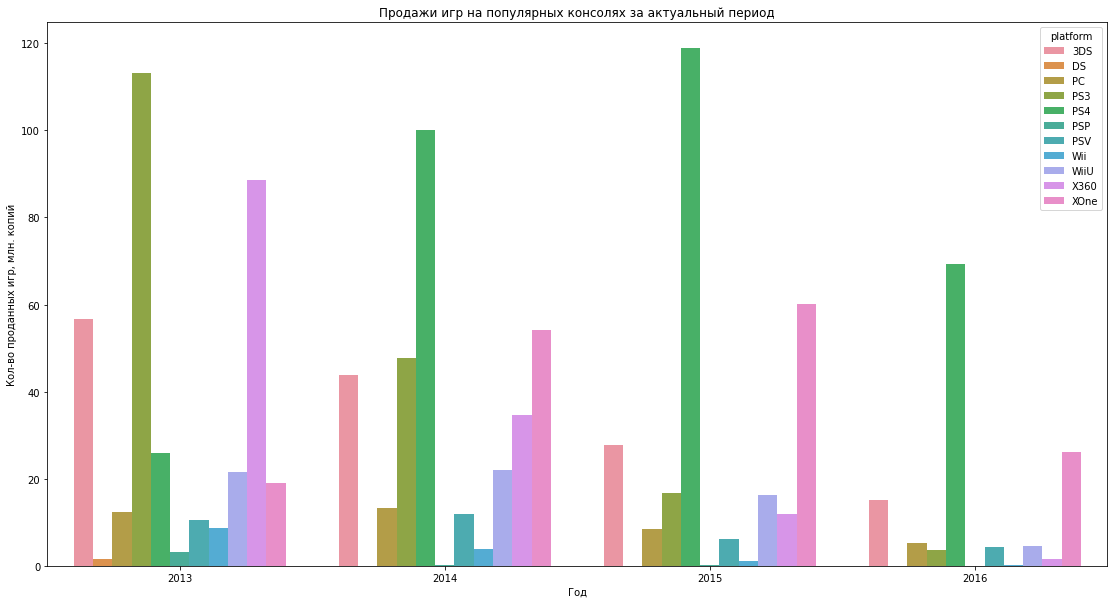

In [116]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.barplot(data=actual_df_pivot.reset_index(), x='year_of_release', y='total_sales', hue='platform', estimator=sum)
plt.title('Продажи игр на популярных консолях за актуальный период')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Год')
plt.show()

In [117]:
display(actual_df_pivot.query('year_of_release == 2016').sort_values(by='total_sales', ascending=False))

,,total_sales
platform,year_of_release,
PS4,2016,69.25
XOne,2016,26.15
3DS,2016,15.14
PC,2016,5.25
WiiU,2016,4.60
PSV,2016,4.25
PS3,2016,3.60
X360,2016,1.52
Wii,2016,0.18


Вывод: в 2016 наблюдается спад продаж по всем консолям. Лучшие показатели продаж за последние 3 года у PS4. На втором месте  XOne - за предыдущие годы он показывал плавнй рост, но как и все консоли 2016 снизил показатели в сравнении с предыдущими периодами. 3DS имеет хорошие показатели в 2016 году, но если смотреть тенденцию, то видим снижение продаж на этй платформе за последние годы. PC ведет себя стабильно - нет особого прироста, но и нет большого падения. 

In [118]:
box_pivot = actual_df.pivot_table(index='platform', values='total_sales', aggfunc=sum).reset_index()

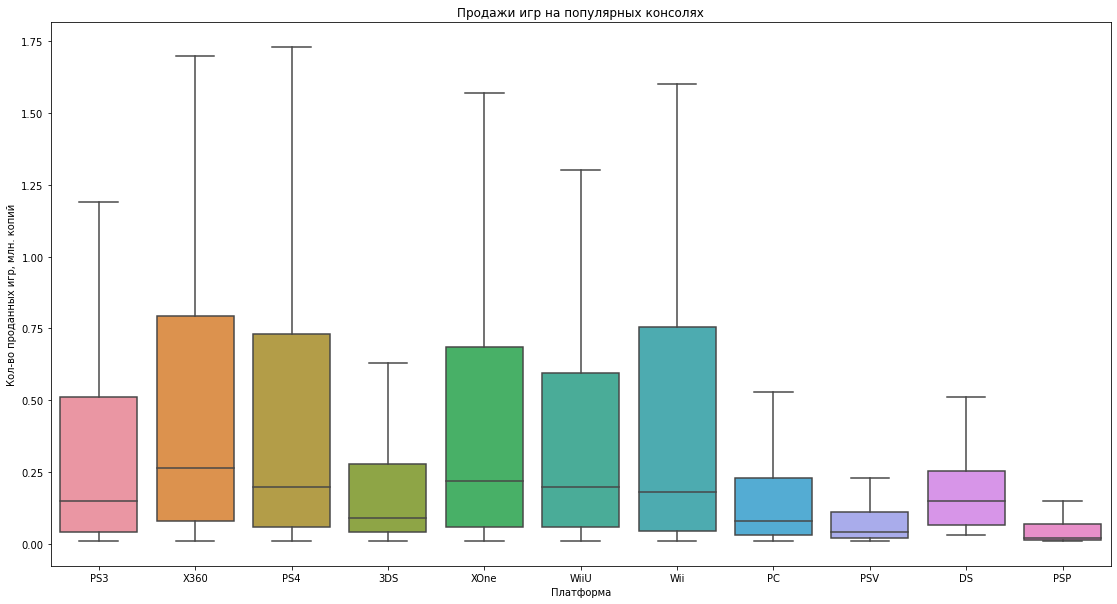

In [119]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.boxplot(data=actual_df,x='platform', y='total_sales', showfliers=False)
plt.title('Продажи игр на популярных консолях')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Платформа')
plt.show()


In [120]:
actual_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,0.488442,72.023209,6.584564
std,1.089439,0.547730,0.512451,0.233997,0.165693,1.235226,12.841318,1.610413
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,0.200000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.030000,66.000000,5.800000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,0.110000,74.000000,7.000000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,0.400000,81.000000,7.800000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,21.050000,97.000000,9.300000


Всего выпущено 2233 игры за 4 года. Самые популярные консоли - PS4, XOne, X360, Wii и WiiU. Самая большая медиана продаж у X360, а самый большой размах у PS4.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

In [121]:
top_actual_platform = actual_df_pivot.query('year_of_release >= 2013').sort_values(by='total_sales', ascending=False).reset_index()
multi_agg = {'total_sales': 'sum'}
top_actual_platform = top_actual_platform.groupby('platform').agg(multi_agg)
top_actual_platform = top_actual_platform.sort_values(by='total_sales', ascending=False).reset_index()
top_actual_platform = top_actual_platform['platform'].head()
top_actual_platform

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
Name: platform, dtype: object

score_table = actual_df.loc[:,['platform','total_sales','critic_score','user_score']]
#score_table

for platform in score_table:
    for platform in top_actual_platform:
        plt.suptitle(f' Взаимосвязь отзывов на продажи: {platform}')
        ax1=plt.subplot(1,2,1)
        ax1.set_title('Взаимосвязь отзывов критиков на продажи')
        score_table.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, label='user_score')
        ax2=plt.subplot(1,2,2)
        ax2.set_title('Взаимосвязь отзывов пользователей на продажи')
        score_table.plot(x='user_score', y='total_sales', kind='scatter', grid=True, label=platform)
        
        plt.ylabel('Оценка')
        plt.xlabel('Кол-во проданных игр, млн. копий')
        plt.show()



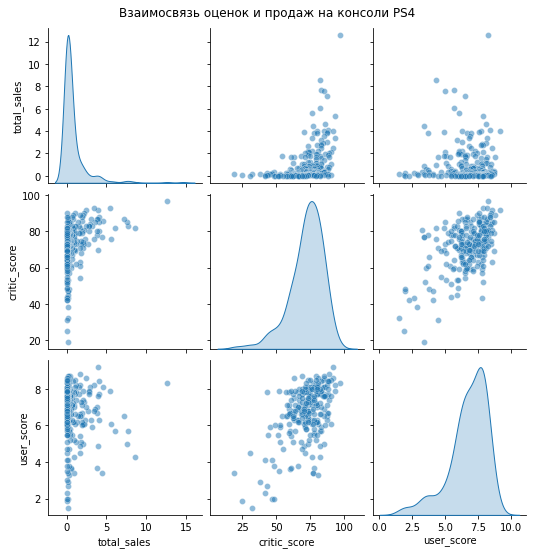

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


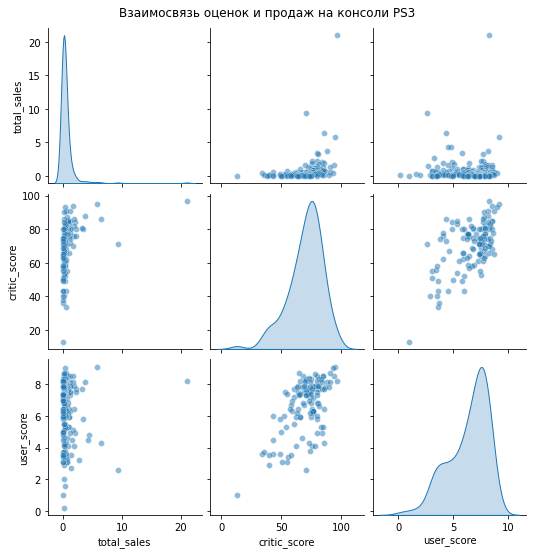

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


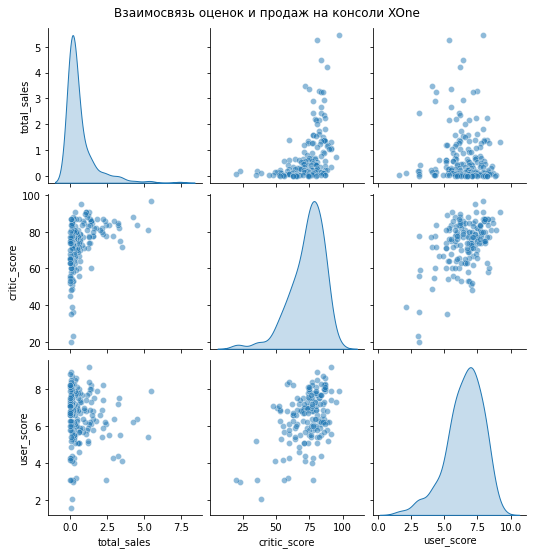

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


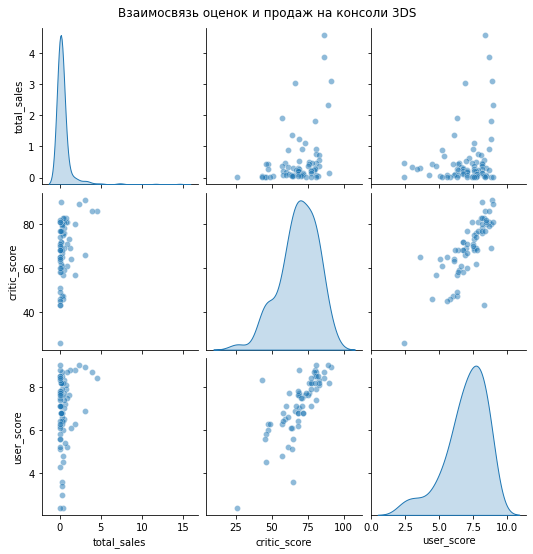

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


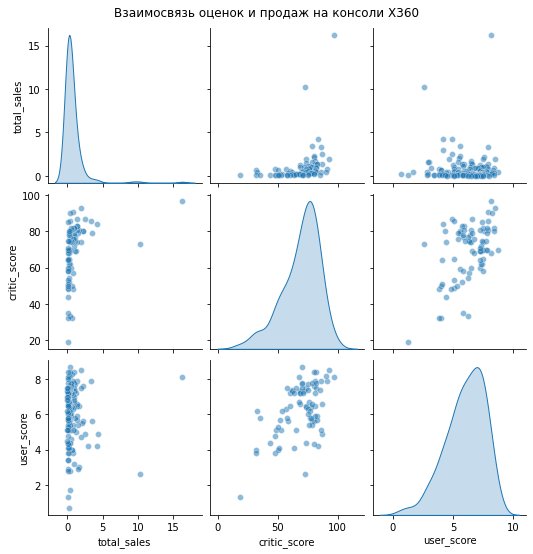

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


In [124]:
for platform in top_actual_platform:
    score_table = actual_df[actual_df.platform == platform][['total_sales', 'critic_score', 'user_score']]
    g = sns.pairplot(score_table, diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle(f'Взаимосвязь оценок и продаж на консоли {platform}', y=1.02)  # y=1.02 немного поднимает заголовок выше
    plt.show()
    display(score_table.corr())

На основе графиков и коэффицинетов корреляции можно сделать вывод, что отзывы слабо влияют на объемы продаж внутри платформ. При этом кореляция отзывов критиков сильнее чем отзывы пользователей.  

In [ ]:
#Код ревьюетра

for platform in top_actual_platform:
    score_table = actual_df.loc[:,['platform','total_sales', 'critic_score', 'user_score']]
    g = sns.pairplot(score_table, diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle(f'Взаимосвязь оценок и продаж на консоли {platform}', y=1.02)  # y=1.02 немного поднимает заголовок выше
    plt.show()

### Анализ жанров

In [ ]:
actual_genre = pd.pivot_table(actual_df, index='genre', values='total_sales', aggfunc='sum')
actual_genre.plot(kind='pie', y= 'total_sales', autopct='%1.1f%%', figsize=(18,9))
plt.title('Популярность жанров')
plt.show()
actual_genre.sort_values(by='total_sales', ascending=False)

Вывод: самые популярные жанры за 4 года от общих продаж - это Action - 29,5% от всех продаж, за ним идут Shooter (21.4%), Sports (13,8%), Role-Playing (13,4%) и Misc (5.8%).

In [ ]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.boxplot(data=actual_df,x='genre', y='total_sales')
plt.title('Продажи игр различных жанров')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Жанр')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(19,10))
fig = sns.boxplot(data=actual_df,x='genre', y='total_sales', showfliers=False)
plt.title('Продажи игр различных жанров')
plt.ylabel('Кол-во проданных игр, млн. копий')
plt.xlabel('Жанр')
plt.show()

Если сравнить графики размаха, то мы видим, что высокая доля продаж Action связана с большим кол-вом выбросов - это говорит о том, что есть точечные релизы игр, которые принесли чрезвычайно много прибыли, но вероятность выпуска прибыльной игры ниже чем в других жанрах.\
Самая высокая медиана и размах продаж у Shooter, за ней идет Sports	и Platform.

## Портрет пользователя каждого региона

Рассмотрим распределение параметров для каждого региона:

### Самые популярные платформы (топ-5):

In [ ]:
(
    actual_df
    .pivot_table(
        index='platform',
        values='na_sales',
        aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .plot(kind='pie', y= 'na_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='platform',
        values='eu_sales',
        aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='pie', y= 'eu_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='platform',
        values='jp_sales',
        aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .plot(kind='pie', y= 'jp_sales', autopct='%1.1f%%', figsize=(12,6))
)
plt.show()

Северной Америке и Европе самая популярная консоль - PS4, а в Японии - 3DS, почти 50% от всех продаж.

### Самые популярные жанры (топ-5)

In [ ]:
(
    actual_df
    .pivot_table(
        index='genre',
        values='na_sales',
        aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .plot(kind='pie', y= 'na_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='genre',
        values='eu_sales',
        aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='pie', y= 'eu_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='genre',
        values='jp_sales',
        aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .plot(kind='pie', y= 'jp_sales', autopct='%1.1f%%', figsize=(12,6))
)

plt.show()

В Америке и Европе самый популярный жанр - Action, а в Японии - Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [ ]:
(
    actual_df
    .pivot_table(
        index='rating',
        values='na_sales',
        aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .plot(kind='pie', y= 'na_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='rating',
        values='eu_sales',
        aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='pie', y= 'eu_sales', autopct='%1.1f%%', figsize=(12,6))
)
(
    actual_df
    .pivot_table(
        index='rating',
        values='jp_sales',
        aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .plot(kind='pie', y= 'jp_sales', autopct='%1.1f%%', figsize=(12,6))
)
plt.show()

В Америке и Европе самые высокие продажи у игр с рейтингом M, в Японии - преобладают продажи с играми без рейтинга. Возможно, это японские игры, которые не проходили сертификацию.   

<b>Вывод:</b> Профиль покупателя в Северной Америке и В Европе по предпочтениям схож - предпочитают консоли PS4, игры с жанром Action и рейтингом M. В Японии кардинально другие предпочтения - самая популярная консоль - 3DS и игры жанра Role-Playing и без рейтинга ESRB.

## Проверка гипотез

В представленных ниже гипотезах будем сравнивать средние значения пользовательских рейтингов. Для этого задаем значение alpha = 0.05 (стандартное значение при котором возможно ошибочное отклонение нулевой гипотезы примерно в 5% проверок. Брать значение меньше не требуется, т.к. в этом вопросе не нужна настолько высокая точность результата.)\
В нулевой гипотезе закладываем утверждение о равенстве показателей, в альтенативной - что эти показатели не равны. Для этого используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Гипотеза Н0:</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
<b>Гипотеза Н1:</b> Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [ ]:
alpha = 0.05
xbox_rating = actual_df.query('platform == "XOne"')['user_score'].dropna()
pc_rating = actual_df.query('platform == "PC"')['user_score'].dropna()
results = st.ttest_ind(
    xbox_rating,
    pc_rating,
    equal_var=False,
    alternative='two-sided'
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

Вывод: Нулевая гипотеза подтверждена - средние пользовательские рейтинги платформ одинаковые. 

### Гипотеза 2:	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Гипотеза Н0:</b> Средние пользовательские рейтинги жанров Action и Sports одинаковые.\
<b>Гипотеза Н1:</b> Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

In [ ]:
alpha = 0.05
action_rating = actual_df.query('genre == "Action"')['user_score'].dropna()
sports_rating = actual_df.query('genre == "Sports"')['user_score'].dropna()
results = st.ttest_ind(
    action_rating,
    sports_rating,
    equal_var=False,
    alternative='two-sided'
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

In [ ]:
print('Средний пользовательский рейтинг жанра Action:', round(action_rating.mean(),2))
print('Средний пользовательский рейтинг жанра Sports:', round(sports_rating.mean(),2))

Вывод: Нулевая гипотеза отвергнута - средние пользовательские рейтинги жанров различаются.  

<b>Вывод:</b> Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, подтверждена. На основе этого можно сделать вывод, что с высокой вероятностью средние пользовательские оценки игр на этих платформах будут одинаковыми.\
Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, получилось отвергнуть. Если вывести средний рейтинг то, мы увидим, что жанр Action практически в 2 раза популярнее жанра Sports.

## Общий вывод

<b>На этапе предобработки:</b> Невосполнимые пропуски были обнаружены в столбцах name, year_of_release, genre - скорее всего это ошибка ввода данных. Большое кол-во пропусков в столбце rating связаны с тем, чтодо 1994 года эта система сертификации игр не существовала. В user_score встречается аббривеатура "tbd" (англ."To Be Determined"), т.е. "будет определено позднее". Эти значения возникли скорее всего из-за того, что данные не аггрегировались в те года, либо не было площадок для системного сбора оценок.
Дубликатов не обнаруженою
Создан новый столбец с суммарными продажами по регионам.
Сейчас получать данные для анализа легче, т.к. вся информация есть на интернет-платформах, нужно только правильным образом настроить алгоритмы сбора данных. \
<b>На этапе исследовательского анализа:</b>\
1. До 1994 года выпускалось меньше 100 игр, после произошел резкий рост индустрии и после 2008 года вновь пошел на спад. Для дальнейшей аналитики можно не рассматривать данные до 1994 года, т.к. они не показывают тенденций рынка, которые могут быть применены к предсказанию на 2017 год.
2. Самая популярная платформа по продажам - PS2, ,более 1 миллиарда проданных копий игр. За ней следуют X360, PS3 и Wii.
3. Большая часть популярных консолей начала появляться после 2000 года. Пиками продаж на одной консоли были 2002, 2003, 2004 для PS2, 2008 и 2009 для Wii, 2010 для X360.
4. Средний срок жизни консоей - 7 лет. Но с течением времени эта цифра сокращается. Для того, чтобы сделать актуальный прогноз, мы взяли для рассмотрения актуальное поколение консолей - PS4, XboxOne и WiiU. Они начали свой цикл в 2013 году, поэтому анализ производился на период с этой даты.
5. В 2016 наблюдается спад продаж по всем консолям. Лучшие показатели продаж за последние 3 года у PS4. На втором месте XOne - за предыдущие годы он показывал плавнй рост, но как и все консоли 2016 снизил показатели в сравнении с предыдущими периодами. 3DS имеет хорошие показатели в 2016 году, но если смотреть тенденцию, то видим снижение продаж на этй платформе за последние годы. PC ведет себя стабильно - нет особого прироста, но и нет большого падения.
6. Всего выпущено 2233 игры за 4 года. Самые популярные консоли - PS4, XOne, X360, Wii и WiiU. Самая большая медиана продаж у X360, а самый большой размах у PS4.
7. На основе графиков и коэффицинетов корреляции сделан вывод, что отзывы слабо влияют на объемы продаж внутри платформ. При этом кореляция с отзывовами критиков сильнее чем с отзывами пользователей.
8. Самые большие доли продаж среди жанров за 4 года - это Action - 29,5% от всех продаж, за ним идут Shooter (21.4%), Sports (13,8%), Role-Playing (13,4%) и Misc (5.8%). Но этот рейтинг достигнут за счет выпуска единичных очень прибыльных игр - основывать стратегию на этих данных будет очень рискованно: популярная игра может выйта, а может - нет. Если смотреть на медианные значения, то наиборее стабильно по популярности ведут себя следующие жанры: самая высокая медиана и размах продаж у Shooter, за ним идет Sports	и Platform.\

<b>Портрет пользователя по регионам:</b>\
Профиль покупателя в Северной Америке и В Европе по предпочтениям схож - предпочитают консоли PS4, игры с жанром Action и рейтингом M. В Японии кардинально другие предпочтения - самая популярная консоль - 3DS и игры жанра Role-Playing и без рейтинга ESRB. Это может быть связано с разницей менталитетов и эту информацию необходимо использовать при определении стратегии продаж.\
<b>Проверка гипотез:</b>\
Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, подтверждена. На основе этого можно сделать вывод, что с высокой вероятностью средние пользовательские оценки игр на этих платформах будут одинаковыми.
Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, получилось отвергнуть. Если вывести средний рейтинг то, мы увидим, что жанр Action практически в 2 раза популярнее жанра Sports.\
<b>Рекомендации:</b>\
Диверсификация продаж по регионам.\
Стоит сфокусироваться на продажах игр Action и Shooter для консолей PS4 и Xbox One для Северной Америки и Европы;
Для Японии - фокус на играх для консолей 3DS, но стоит помнить, что срок жизни этой приставки подходит к концу. Популярные жанры игр - Role-Playing и Action. Рейтинг - T и E. \
Среди жанров стабильный объем продаж могут обеспечить Shooter, Sports и Platform.
